In [9]:
# Imports
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical


#importación de librerias
import tensorflow as tf
from tensorflow import keras

import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder   #desviación estandar
from sklearn.preprocessing import MinMaxScaler     #min max

from sklearn import preprocessing

from imblearn.over_sampling import SMOTE#oversampling

import seaborn as sns
import matplotlib.ticker as ticker
from sklearn.metrics import matthews_corrcoef


from sklearn.decomposition import PCA

In [4]:
def Normalizacion_MinMax(entradas):
    sc = MinMaxScaler()
    sc.fit(entradas)
    return sc.transform(entradas)

In [6]:
# Leer Base de Datos
basededatos = pd.read_csv("./dataset/db_eiz_v3.txt", sep=",")
basededatorespaldo = basededatos
basededatos['estatuscuenta'] = basededatos['estatuscuenta']-2
dataset = basededatos.drop(['estatuscuenta'],axis = 1)

pos = format(sum(basededatos['estatuscuenta']==0))
neg = format(sum(basededatos['estatuscuenta']==1))
total = neg + pos
print(neg,"   ",pos)

#preprocesamiento base de datos
salidas = basededatos['estatuscuenta']
entradas = basededatos.drop(['estatuscuenta'],axis = 1)
print(salidas.shape,"    ",entradas.shape)
entradas = Normalizacion_MinMax(entradas)

1755     3482
(5237,)      (5237, 22)


In [7]:
#separación de los datos de entrenamiento, validación y pruebas
x_train, x_test, y_train, y_test = train_test_split(entradas, salidas, test_size=0.3, stratify=salidas)
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size=0.3,stratify=y_train)


print(x_train.shape,"  ",y_train.shape)
print(x_validation.shape,"  ",y_validation.shape)
print(x_test.shape,"  ",y_test.shape)
print(entradas.shape)

(2565, 22)    (2565,)
(1100, 22)    (1100,)
(1572, 22)    (1572,)
(5237, 22)


In [8]:
sm = SMOTE()
print(x_train.shape,"  ",y_train.shape)
print("datos:   {}".format(sum(y_train==1)))
print("datos:   {}".format(sum(y_train==0)))

print(x_validation.shape,"  ",y_validation.shape)
print(x_test.shape,"  ",y_test.shape)
print(entradas.shape)
x_train, y_train = sm.fit_resample(x_train,y_train.ravel())
print("      ",x_train.shape,"  ",y_train.shape)
print("      ",x_validation.shape,"  ",y_validation.shape)
print("      ",x_test.shape,"  ",y_test.shape)
print("      ",entradas.shape)

(2565, 22)    (2565,)
datos:   859
datos:   1706
(1100, 22)    (1100,)
(1572, 22)    (1572,)
(5237, 22)
       (3412, 22)    (3412,)
       (1100, 22)    (1100,)
       (1572, 22)    (1572,)
       (5237, 22)


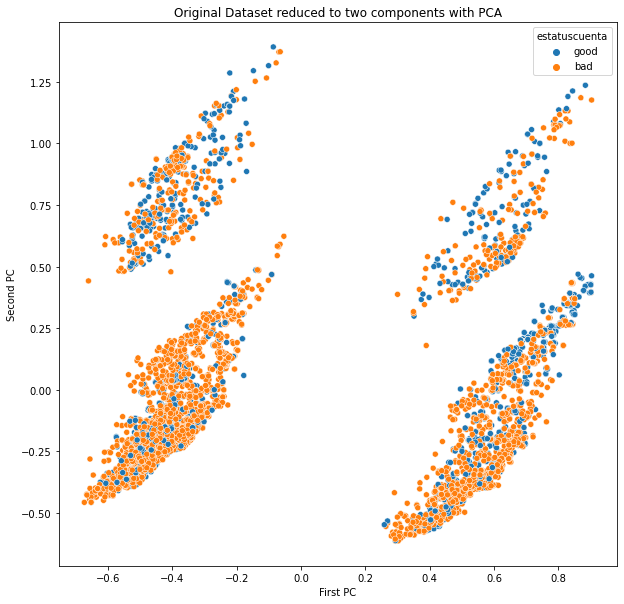

In [13]:
pca = PCA(n_components=2)
X_pca_visualization = pca.fit_transform(entradas)


fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(x=X_pca_visualization[:, 0], y=X_pca_visualization[:, 1], hue=basededatos["estatuscuenta"].replace({1:"good", 0:"bad"}))
ax.set_title("Original Dataset reduced to two components with PCA")
ax.set_xlabel("First PC")
ax.set_ylabel("Second PC")
plt.show()

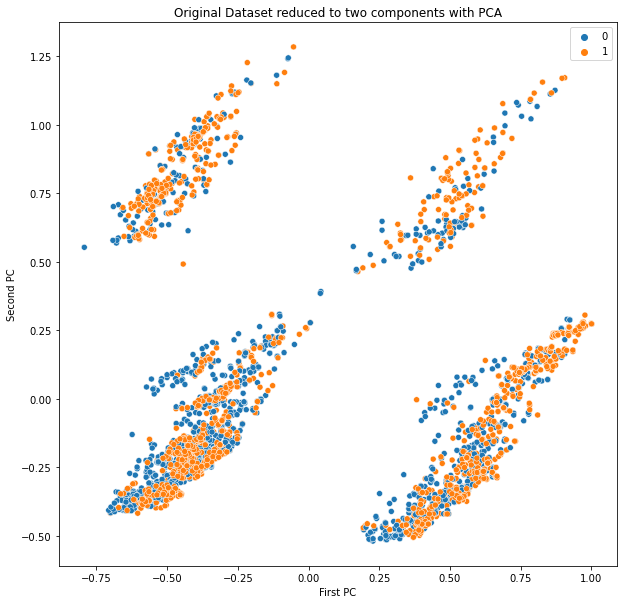

In [19]:
pca = PCA(n_components=2)
X_pca_visualization = pca.fit_transform(x_train)


fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(x=X_pca_visualization[:, 0], y=X_pca_visualization[:, 1], hue=y_train)
ax.set_title("Original Dataset reduced to two components with PCA")
ax.set_xlabel("First PC")
ax.set_ylabel("Second PC")
plt.show()